In [15]:
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from DBSCAN import evaluate
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [16]:
articles = pd.read_csv("scraping/100Articles.csv")
le = preprocessing.LabelEncoder()
le.fit(articles['category'])
articles['category_categorical'] = le.transform(articles['category'])
articles

,Unnamed: 0,year,ID,title,category,text,category_categorical
0,0,2010,1,Identification of Orbital Eclipses in LAMOST J...,astro-ph,"Draft version October 2, 2020\nTypeset using L...",0
1,0,2010,2,Chemically Homogeneous Evolution: A rapid popu...,astro-ph,"MNRAS 000, 1{16 (2021) Preprint 4 May 2021 Com...",0
2,0,2010,3,Spectral Decomposition in Deep Networks for Se...,cs,Spectral Decomposition in Deep Networks for\nS...,2
3,0,2010,4,CrowdEst: A Method for Estimating (and not Sim...,cs,CGI2019 - TVCJ manuscript No.\n(will be insert...,2
4,0,2010,5,Stable remnants and quantum gravity effects in...,hep-th,arXiv:2010.00005v1 [gr-qc] 30 Sep 2020Stable...,6
...,...,...,...,...,...,...,...
94,0,2010,95,Effect of surface disorder on the chiral surfa...,cond-mat,Effect of surface disorder on the chiral surfa...,1
95,0,2010,96,$t$-Resilient $k$-Immediate Snapshot and its R...,cs,arXiv:2010.00096v1 [cs.DC] 30 Sep 2020t-Resi...,2
96,0,2010,97,Extensions of the Stone Duality to the categor...,math,arXiv:2010.00097v1 [math.GN] 30 Sep 2020Exte...,7
97,0,2010,98,Massive Uncoordinated Multiple Access for Beyo...,cs,1\nMassive Uncoordinated Multiple Access\nfor ...,2


In [17]:
corpus = articles['text']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Estimated number of clusters: 14
Estimated number of noise points: 0
Homogeneity: 0.155
Completeness: 0.403
V-measure: 0.224
Adjusted Rand Index: 0.030
Adjusted Mutual Information: 0.034
Silhouette Coefficient: 0.348
14


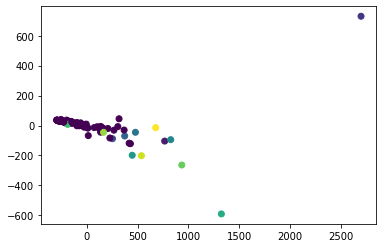

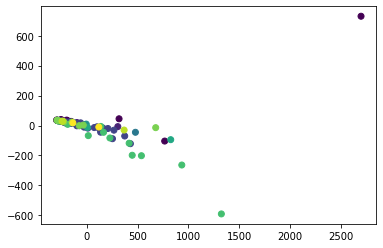

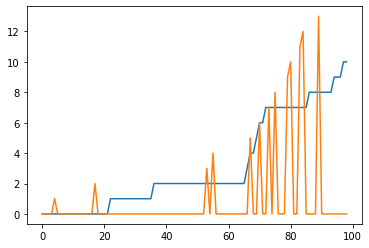

In [18]:
eps = 400
minPts = 1
vectors = X.toarray()
label = articles['category_categorical'].values
order = np.argsort(label)
label = label[order]
vectors = np.array(vectors)[order]

clustering = DBSCAN(eps=eps, min_samples=minPts).fit(vectors)
labels = clustering.labels_

evaluate(labels, label, vectors, False)

print(len(np.unique(labels)))

pca = PCA()
Xt = pca.fit_transform(vectors)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=labels)
plt.show()

plot = plt.scatter(Xt[:,0], Xt[:,1], c=label)
plt.show()

plt.plot(label)
plt.plot(labels)
plt.show()

Reprezentacja z wykorzystaniem CountVectorizer zdaje się dawać trochę lepsze wyniki niż word2vec. Jak widać na powyższym wykresie, czasami algorytm znajduje różne kategorie. Prawdopodobnie te artykuły, które nie mają klasy 0 wyróżniają się czymś od innych.

# Eksperymenty z mniejszą liczbą artykułów

Estimated number of clusters: 5
Estimated number of noise points: 0
Homogeneity: 0.758
Completeness: 0.668
V-measure: 0.710
Adjusted Rand Index: 0.396
Adjusted Mutual Information: 0.408
Silhouette Coefficient: 0.328
5


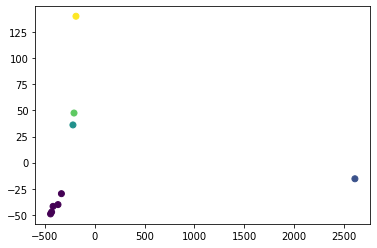

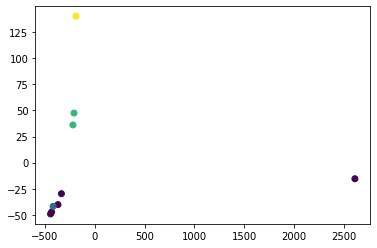

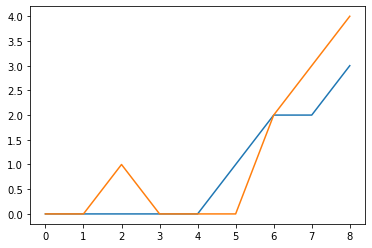

In [19]:
articles = pd.read_csv("scraping/10Articles.csv")
le = preprocessing.LabelEncoder()
le.fit(articles['category'])
articles['category_categorical'] = le.transform(articles['category'])

corpus = articles['text']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

eps = 100
minPts = 1
vectors = X.toarray()
label = articles['category_categorical'].values
order = np.argsort(label)
label = label[order]
vectors = np.array(vectors)[order]

clustering = DBSCAN(eps=eps, min_samples=minPts).fit(vectors)
labels = clustering.labels_

evaluate(labels, label, vectors, False)

print(len(np.unique(labels)))

pca = PCA()
Xt = pca.fit_transform(vectors)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=labels)
plt.show()

plot = plt.scatter(Xt[:,0], Xt[:,1], c=label)
plt.show()

plt.plot(label)
plt.plot(labels)
plt.show()

Przy mniejszej liczbie artkułów algorytm i cały nasz proces przetwarzania zdaje się działać lepiej. Przypuszczamy, że wynika to z tego, że dla mniejszych ilości danych łatwiej otrzymać sensowną reprezentację danych.

Estimated number of clusters: 4
Estimated number of noise points: 0
Homogeneity: 0.758
Completeness: 0.758
V-measure: 0.758
Adjusted Rand Index: 0.476
Adjusted Mutual Information: 0.559
Silhouette Coefficient: 0.382
4


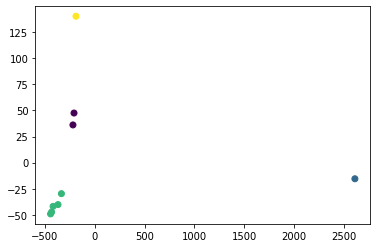

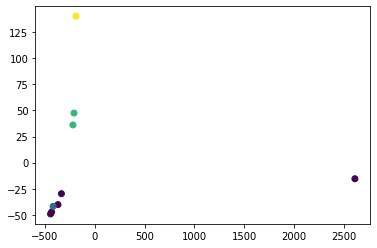

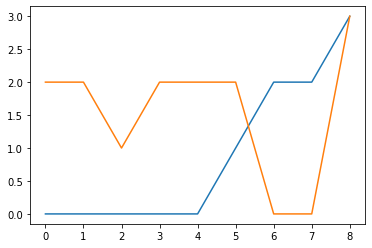

In [20]:
clustering = KMeans(n_clusters=4, random_state=0).fit(vectors)
labels = clustering.labels_

evaluate(labels, label, vectors, False)

print(len(np.unique(labels)))

pca = PCA()
Xt = pca.fit_transform(vectors)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=labels)
plt.show()

plot = plt.scatter(Xt[:,0], Xt[:,1], c=label)
plt.show()

plt.plot(label)
plt.plot(labels)
plt.show()

Postanowiliśmy porównać nasze rozwiązanie problemy z rozwiązaniem wykorzystującym KMean, co ciekawe KMean sprawuje się gorzej, jest to nie zgodne z naszymi oczekiwaniami.

# Eksperymenty z hdbscan

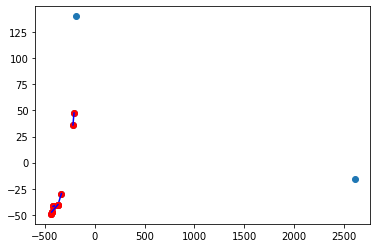

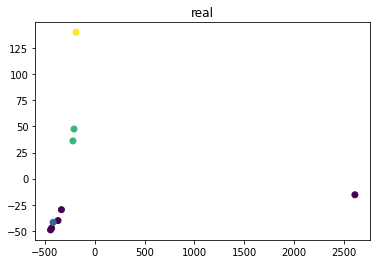

In [31]:
from DBSCAN import HDBSCAN

eps = 50

pca = PCA()
Xt = pca.fit_transform(vectors)
clustering = HDBSCAN(Xt, eps)

plot = plt.scatter(Xt[:,0], Xt[:,1], c=label)
plt.title('real')
plt.show()